# Analyse Exploratoire - Fashion Store Sales

Ce notebook presente l'analyse exploratoire du jeu de donnees des ventes d'un site e-commerce de mode. L'objectif est d'examiner la structure du fichier, identifier les entites metier principales, et mettre en evidence les redondances et anomalies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/fashion_store_sales.csv')
print(f"Dimensions : {df.shape[0]} lignes, {df.shape[1]} colonnes")
df.head()

Dimensions : 2253 lignes, 29 colonnes


,sale_date,item_id,sale_id,product_id,quantity,original_price,unit_price,discount_applied,discount_percent,discounted,...,catalog_price,cost_price,customer_id,gender,age_range,signup_date,first_name,last_name,email,country
0,2025-06-16,2270,658,403,1,81.80,81.80,0.0,0.00%,0,...,81.80,45.12,835,Female,46-55,2025-04-26,Dusty,Comerford,dcomerfordn6@google.nl,Portugal
1,2025-06-17,1170,336,284,1,81.79,81.79,0.0,0.00%,0,...,81.79,35.02,790,Female,16-25,2025-04-26,Beale,Seeds,bseedslx@phpbb.com,France
2,2025-04-16,2496,1255,71,1,80.76,80.76,0.0,0.00%,0,...,80.76,51.01,464,Female,36-45,2025-04-14,Juan,Blacklock,jblacklockcv@discuz.net,Germany
3,2025-05-06,1273,331,98,1,78.52,78.52,0.0,0.00%,0,...,78.52,41.48,100,Female,26-35,2025-01-30,Godfry,Cockerill,gcockerill2r@vimeo.com,Italy
4,2025-06-15,1829,1079,98,1,78.52,78.52,0.0,0.00%,0,...,78.52,41.48,837,Female,46-55,2025-03-02,NaN,Kilby,lkilbyn8@wordpress.com,Germany


## 1. Structure du fichier

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sale_date          2253 non-null   object 
 1   item_id            2253 non-null   int64  
 2   sale_id            2253 non-null   int64  
 3   product_id         2253 non-null   int64  
 4   quantity           2253 non-null   int64  
 5   original_price     2253 non-null   float64
 6   unit_price         2253 non-null   float64
 7   discount_applied   2253 non-null   float64
 8   discount_percent   2253 non-null   object 
 9   discounted         2253 non-null   int64  
 10  item_total         2253 non-null   float64
 11  channel            2253 non-null   object 
 12  channel_campaigns  2253 non-null   object 
 13  total_amount       2028 non-null   float64
 14  product_name       2253 non-null   object 
 15  category           2253 non-null   object 
 16  brand              2253 

In [3]:
summary = pd.DataFrame({
    'type': df.dtypes,
    'non_null': df.notna().sum(),
    'null': df.isna().sum(),
    'unique': df.nunique(),
    'exemple': df.iloc[0]
})
summary

,type,non_null,null,unique,exemple
sale_date,object,2253,0,51,2025-06-16
item_id,int64,2253,0,2253,2270
sale_id,int64,2253,0,905,658
product_id,int64,2253,0,499,403
quantity,int64,2253,0,5,1
original_price,float64,2253,0,475,81.8
unit_price,float64,2253,0,638,81.8
discount_applied,float64,2253,0,182,0.0
discount_percent,object,2253,0,3,0.00%
discounted,int64,2253,0,2,0


## 2. Identification des entites metier

En analysant les cardinalites, on identifie :

In [4]:
entities = {
    'Articles de vente (item_id)': df['item_id'].nunique(),
    'Ventes (sale_id)': df['sale_id'].nunique(),
    'Produits (product_id)': df['product_id'].nunique(),
    'Clients (customer_id)': df['customer_id'].nunique(),
    'Canaux (channel)': df['channel'].nunique(),
}
for k, v in entities.items():
    print(f"{k}: {v} valeurs uniques")

print(f"Nombre moyen d'articles par vente : {df.shape[0] / df['sale_id'].nunique():.1f}")

Articles de vente (item_id): 2253 valeurs uniques
Ventes (sale_id): 905 valeurs uniques
Produits (product_id): 499 valeurs uniques
Clients (customer_id): 580 valeurs uniques
Canaux (channel): 2 valeurs uniques
Nombre moyen d'articles par vente : 2.5


In [5]:
items_per_sale = df.groupby('sale_id')['item_id'].count()
print("Distribution du nombre d'articles par vente :")
print(items_per_sale.value_counts().sort_index())

Distribution du nombre d'articles par vente :
item_id
2    462
3    443
Name: count, dtype: int64


## 3. Analyse de redondance

Dans le fichier plat, les attributs client sont répétés à chaque ligne ou le client apparait. Idem pour les produits.

In [6]:
customer_cols = ['customer_id', 'first_name', 'last_name', 'email', 'gender', 'age_range', 'signup_date', 'country']
product_cols = ['product_id', 'product_name', 'category', 'brand', 'color', 'size', 'catalog_price', 'cost_price']

nb_customer_rows = df.shape[0]
nb_unique_customers = df['customer_id'].nunique()
nb_unique_products = df['product_id'].nunique()

print(f"Attributs client répétés en moyenne {nb_customer_rows / nb_unique_customers:.1f}x")
print(f"Attributs produit répétés en moyenne {nb_customer_rows / nb_unique_products:.1f}x")

Attributs client répétés en moyenne 3.9x
Attributs produit répétés en moyenne 4.5x


## 4. Valeurs manquantes

In [7]:
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(1)
missing_df = pd.DataFrame({'manquants': missing, 'pourcentage': missing_pct})
missing_df[missing_df['manquants'] > 0]

,manquants,pourcentage
total_amount,225,10.0
first_name,116,5.1
last_name,64,2.8
email,224,9.9


In [8]:
empty_str = (df == '').sum()
for col in ['first_name', 'last_name', 'email', 'total_amount']:
    null_count = df[col].isna().sum()
    empty_count = (df[col].astype(str).str.strip() == '').sum() if null_count == 0 else null_count
    print(f"{col}: {empty_count} valeurs manquantes ou vides")

first_name: 116 valeurs manquantes ou vides
last_name: 64 valeurs manquantes ou vides
email: 224 valeurs manquantes ou vides
total_amount: 225 valeurs manquantes ou vides


## 5. Coherence de product_id

In [9]:
product_attrs = ['product_name', 'category', 'brand', 'color', 'size', 'catalog_price', 'cost_price']
consistency = df.groupby('product_id')[product_attrs].nunique()
inconsistent = consistency[consistency.gt(1).any(axis=1)]

if inconsistent.empty:
    print("Tous les product_id sont coherents avec leurs attributs.")
else:
    print(f"{len(inconsistent)} product_id incoherents detectes :")
    print(inconsistent)

Tous les product_id sont coherents avec leurs attributs.


In [10]:
customer_attrs = ['gender', 'age_range', 'signup_date', 'country']
cust_consistency = df.groupby('customer_id')[customer_attrs].nunique()
cust_inconsistent = cust_consistency[cust_consistency.gt(1).any(axis=1)]

if cust_inconsistent.empty:
    print("Tous les customer_id sont coherents avec leurs attributs.")
else:
    print(f"{len(cust_inconsistent)} customer_id incoherents :")
    print(cust_inconsistent)

Tous les customer_id sont coherents avec leurs attributs.


## 6. Valeurs du domaine

In [11]:
categorical = ['channel', 'channel_campaigns', 'category', 'brand', 'color', 'size', 'gender', 'age_range', 'country']

for col in categorical:
    print(f"\n-{col} ({df[col].nunique()} valeurs)")
    print(df[col].value_counts())


-channel (2 valeurs)
channel
E-commerce    1170
App Mobile    1083
Name: count, dtype: int64

-channel_campaigns (4 valeurs)
channel_campaigns
Website Banner    1151
App Mobile         963
Social Media       120
Email               19
Name: count, dtype: int64

-category (5 valeurs)
category
T-Shirts     492
Dresses      482
Shoes        472
Sleepwear    455
Pants        352
Name: count, dtype: int64

-brand (1 valeurs)
brand
Tiva    2253
Name: count, dtype: int64

-color (5 valeurs)
color
Blue     485
Green    465
Black    454
Red      437
White    412
Name: count, dtype: int64

-size (9 valeurs)
size
XS    493
S     358
XL    354
L     350
M     322
36    109
38     93
35     92
40     82
Name: count, dtype: int64

-gender (1 valeurs)
gender
Female    2253
Name: count, dtype: int64

-age_range (5 valeurs)
age_range
36-45    477
26-35    463
16-25    455
46-55    433
56-65    425
Name: count, dtype: int64

-country (6 valeurs)
country
Germany        537
France         498
Italy      

## 7. Analyse des remises

In [12]:
discounted = df[df['discount_applied'] > 0]
print(f"Lignes avec remise : {len(discounted)} sur {len(df)} ({len(discounted)/len(df)*100:.1f}%)")
print(f"\nValeurs distinctes de discount_percent :")
print(df['discount_percent'].value_counts())

Lignes avec remise : 222 sur 2253 (9.9%)

Valeurs distinctes de discount_percent :
discount_percent
0.00%     2031
30.00%     159
10.00%      63
Name: count, dtype: int64


## 8. Distributions statistiques

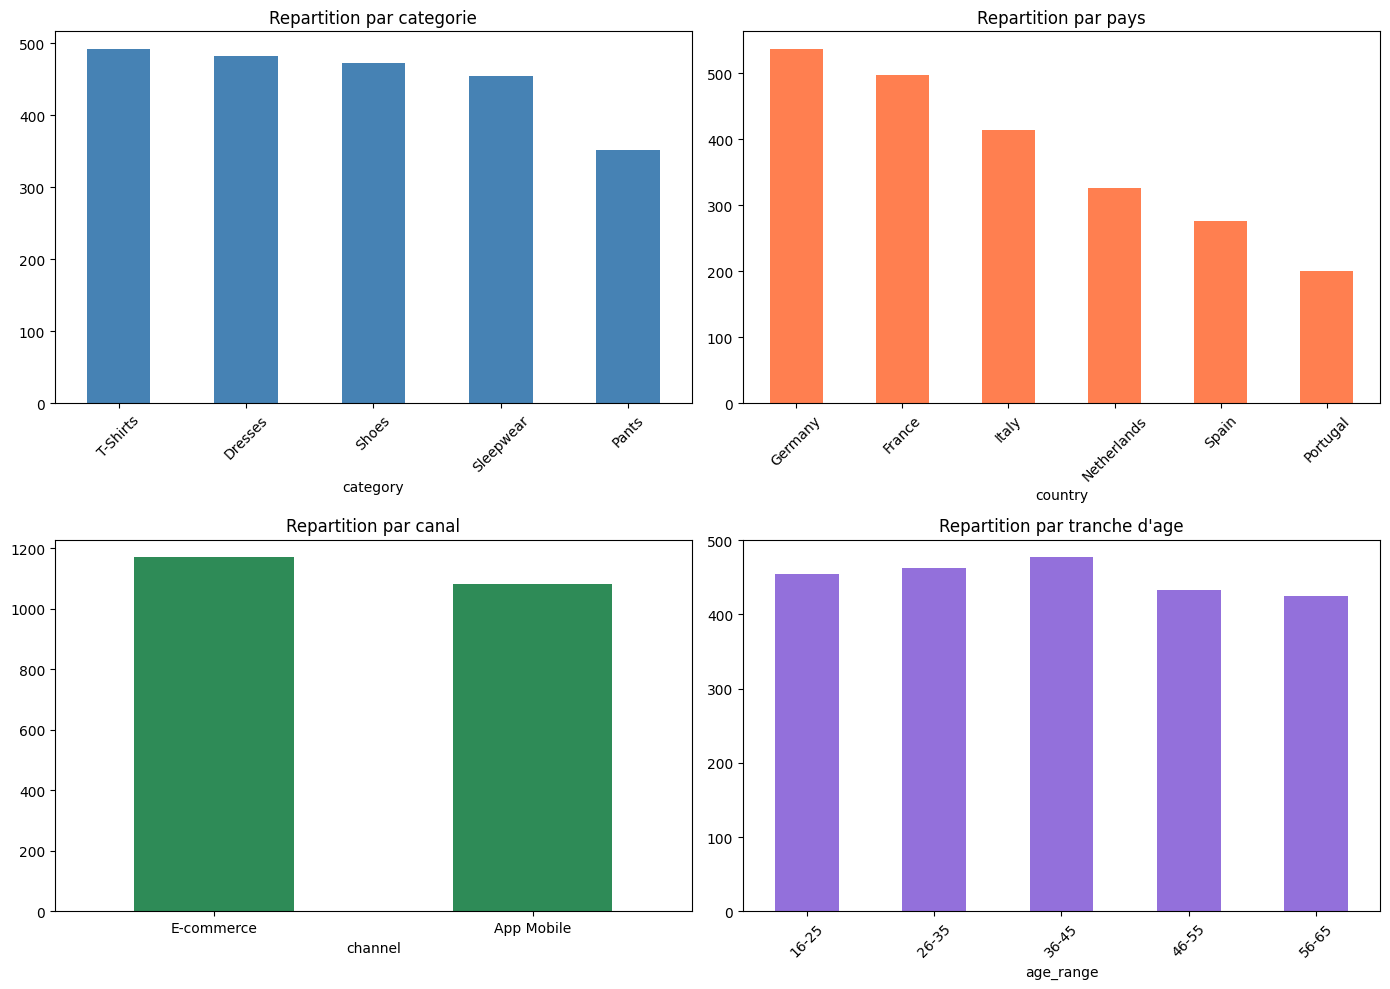

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

df['category'].value_counts().plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Repartition par categorie')
axes[0, 0].tick_params(axis='x', rotation=45)

df['country'].value_counts().plot(kind='bar', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Repartition par pays')
axes[0, 1].tick_params(axis='x', rotation=45)

df['channel'].value_counts().plot(kind='bar', ax=axes[1, 0], color='seagreen')
axes[1, 0].set_title('Repartition par canal')
axes[1, 0].tick_params(axis='x', rotation=0)

df['age_range'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], color='mediumpurple')
axes[1, 1].set_title('Repartition par tranche d\'age')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

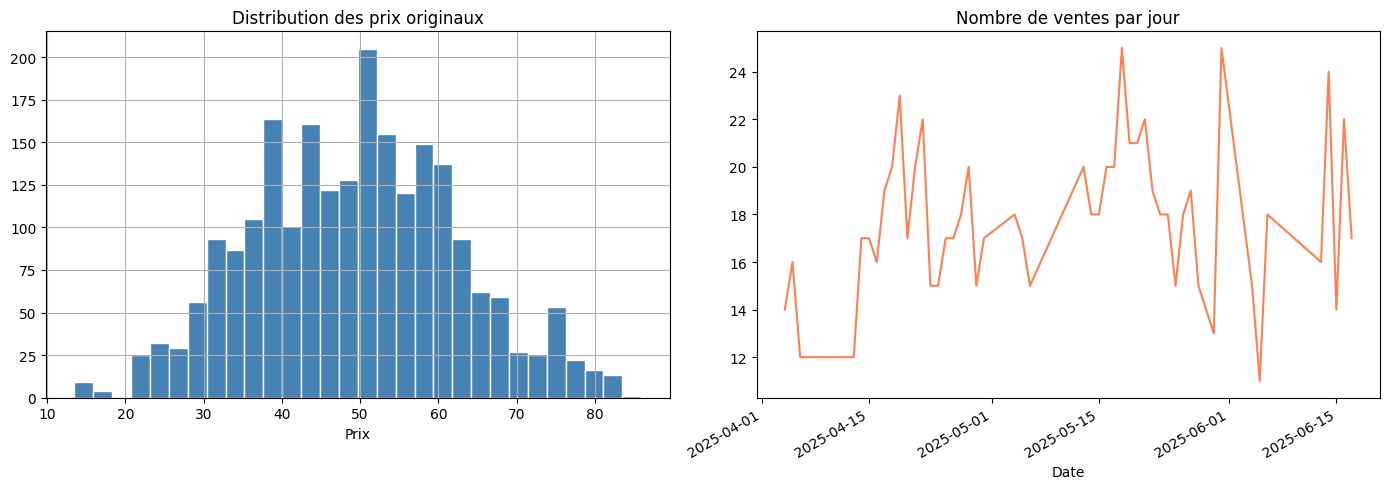

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['original_price'].hist(bins=30, ax=axes[0], color='steelblue', edgecolor='white')
axes[0].set_title('Distribution des prix originaux')
axes[0].set_xlabel('Prix')

df['sale_date'] = pd.to_datetime(df['sale_date'])
daily_sales = df.groupby('sale_date')['sale_id'].nunique()
daily_sales.plot(ax=axes[1], color='coral')
axes[1].set_title('Nombre de ventes par jour')
axes[1].set_xlabel('Date')

plt.tight_layout()
plt.show()

## 11. Plage de dates

In [15]:
print(f"Premiere date : {df['sale_date'].min()}")
print(f"Derniere date : {df['sale_date'].max()}")
print(f"Nombre de jours distincts : {df['sale_date'].nunique()}")

Premiere date : 2025-04-04 00:00:00
Derniere date : 2025-06-17 00:00:00
Nombre de jours distincts : 51
